In [141]:
%matplotlib inline

import sys
PATH = '/Users/francescogemignani/Desktop/fma-proj'
sys.path.insert(0, PATH) 
from fma_metadata import utils

# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Regression Libraries
import statsmodels.api as sm
#from termcolor import colored as cl
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error




import warnings
warnings.filterwarnings('ignore')

## A) Import and Merge Dataset

In [142]:
echonest = utils.load("/Users/francescogemignani/Google Drive/DM2/_FMA/fma_metadata/echonest.csv")
tracks = utils.load("/Users/francescogemignani/Google Drive/DM2/_FMA/fma_metadata/tracks.csv")

In [143]:
echo_genres = echonest['echonest','audio_features'].merge(tracks['track'][['genre_top']],on='track_id')
echo_genres.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence genre_top  
track_id                                            
2            0.159310  165.922  0.576661   Hip-Hop  
3            0.461818  126.957  0.269240   Hip-Hop  
5            0.124595  100.260  0.621661   Hip-Hop  
10           0.032985  111.562  0.963590       Pop  
134          0.525519  114.290  0.894072   Hip-Hop

In [144]:
echo_genres['genre_top'].value_counts()

Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Spoken                    0
Soul-RnB                  0
Easy Listening            0
Country                   0
Name: genre_top, dtype: int64

## B) Anomaly Detection
Execute Isolation forest on all echonest dataset

## C) Linear Relationships
#### Echonest Correlations
Make a echonest sub-selection for each genre. In particular, we've selected genres that occours the most. For each echo_genre dataset we search some positive or negative linear relationship between echonest features.

In [145]:
def corr4genre(genres,genre):
    echo_genre = genres[genres['genre_top'].isin([genre])]
    del echo_genre['genre_top']
    sns.heatmap(echo_genre.corr(),annot=True)
    plt.title("Correlation Matrix Echonest "+str(genre), fontsize=14)
    return echo_genre

#### Rock

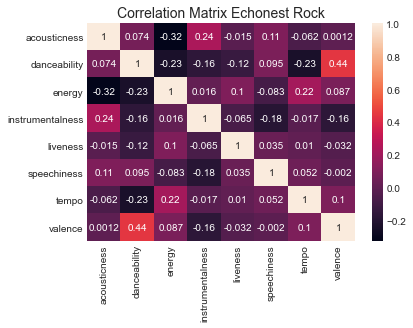

In [72]:
#Check Rock correlation
echo_rock = corr4genre(echo_genres,'Rock')

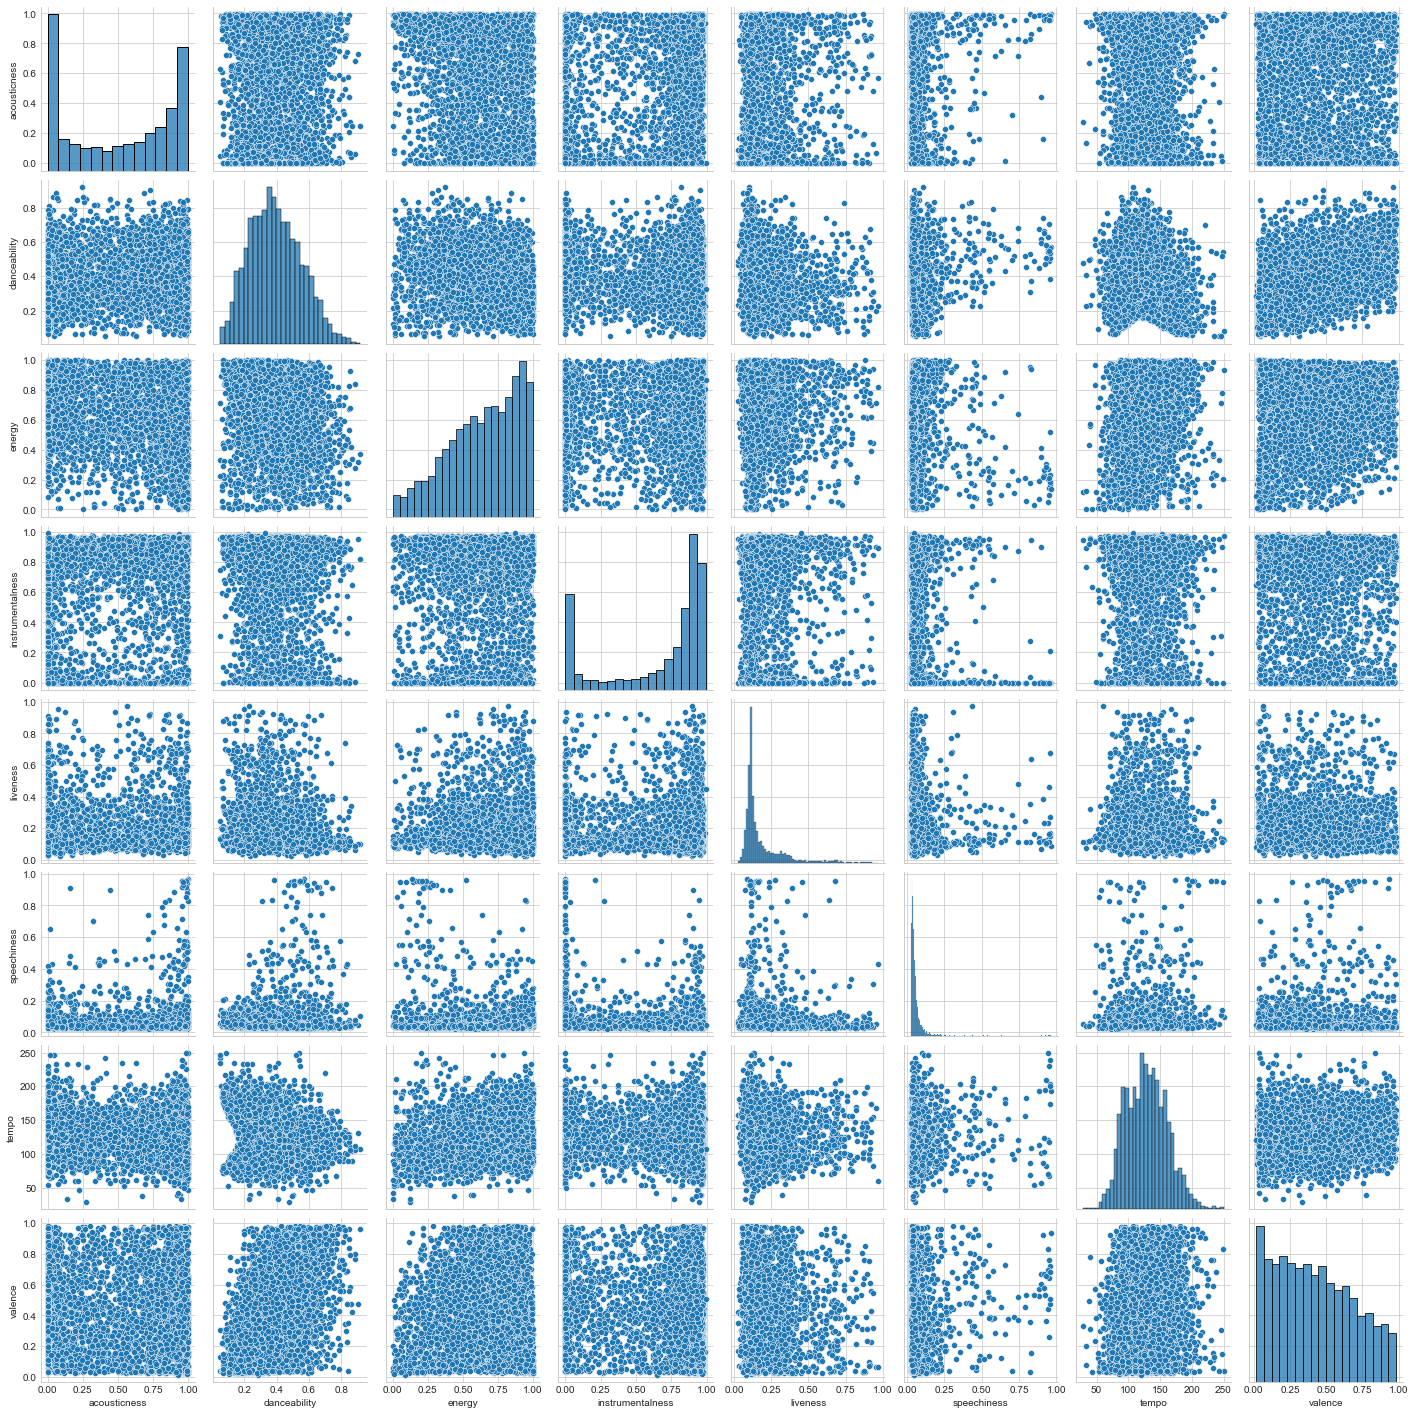

In [73]:
sns.pairplot(echo_rock)

#### Electronic

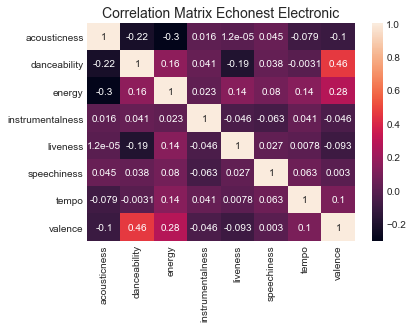

In [74]:
#Check Electronic correlation
echo_electro = corr4genre(echo_genres,'Electronic')

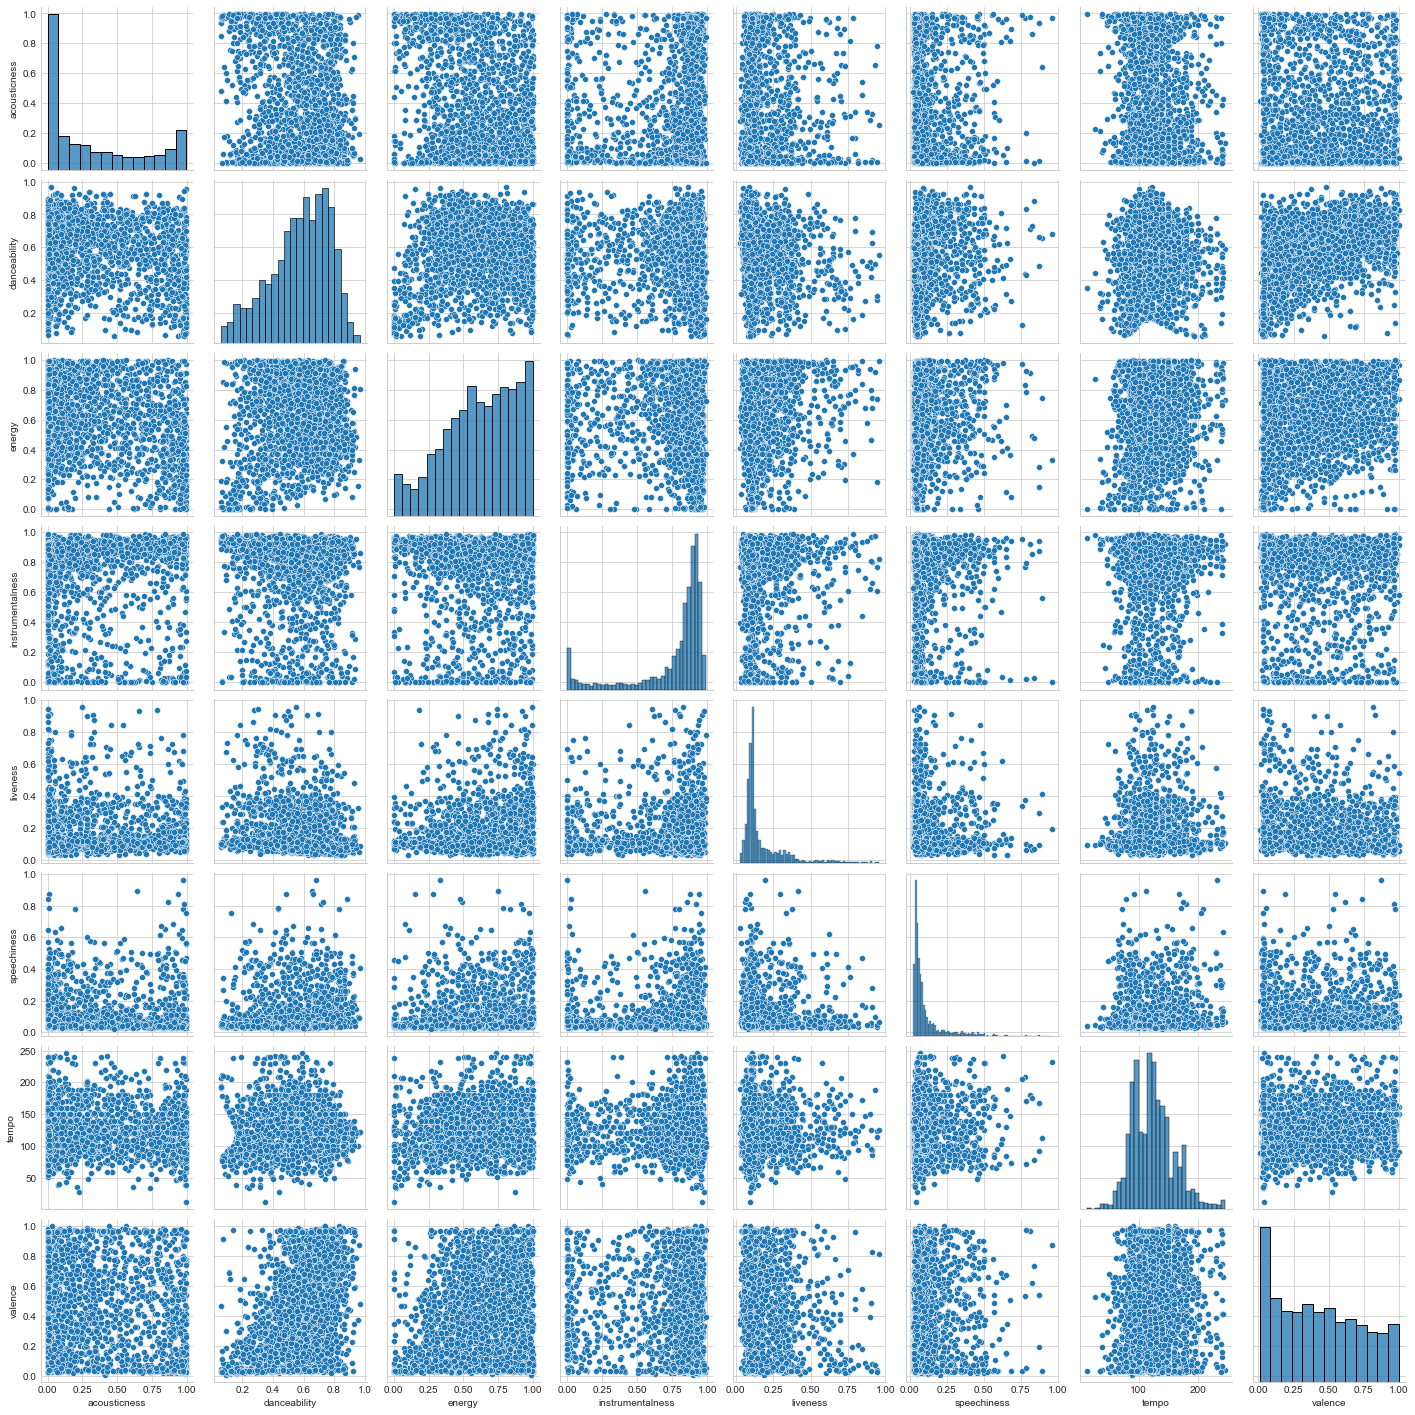

In [75]:
sns.pairplot(echo_electro)

#### Hip-Hop

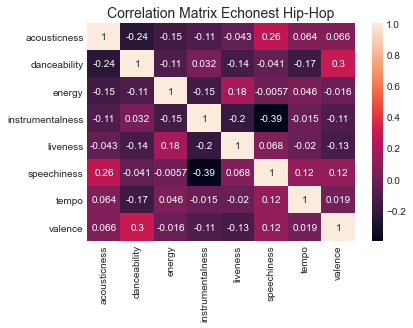

In [76]:
#Check Hip-Hop correlation
echo_hh = corr4genre(echo_genres,'Hip-Hop')

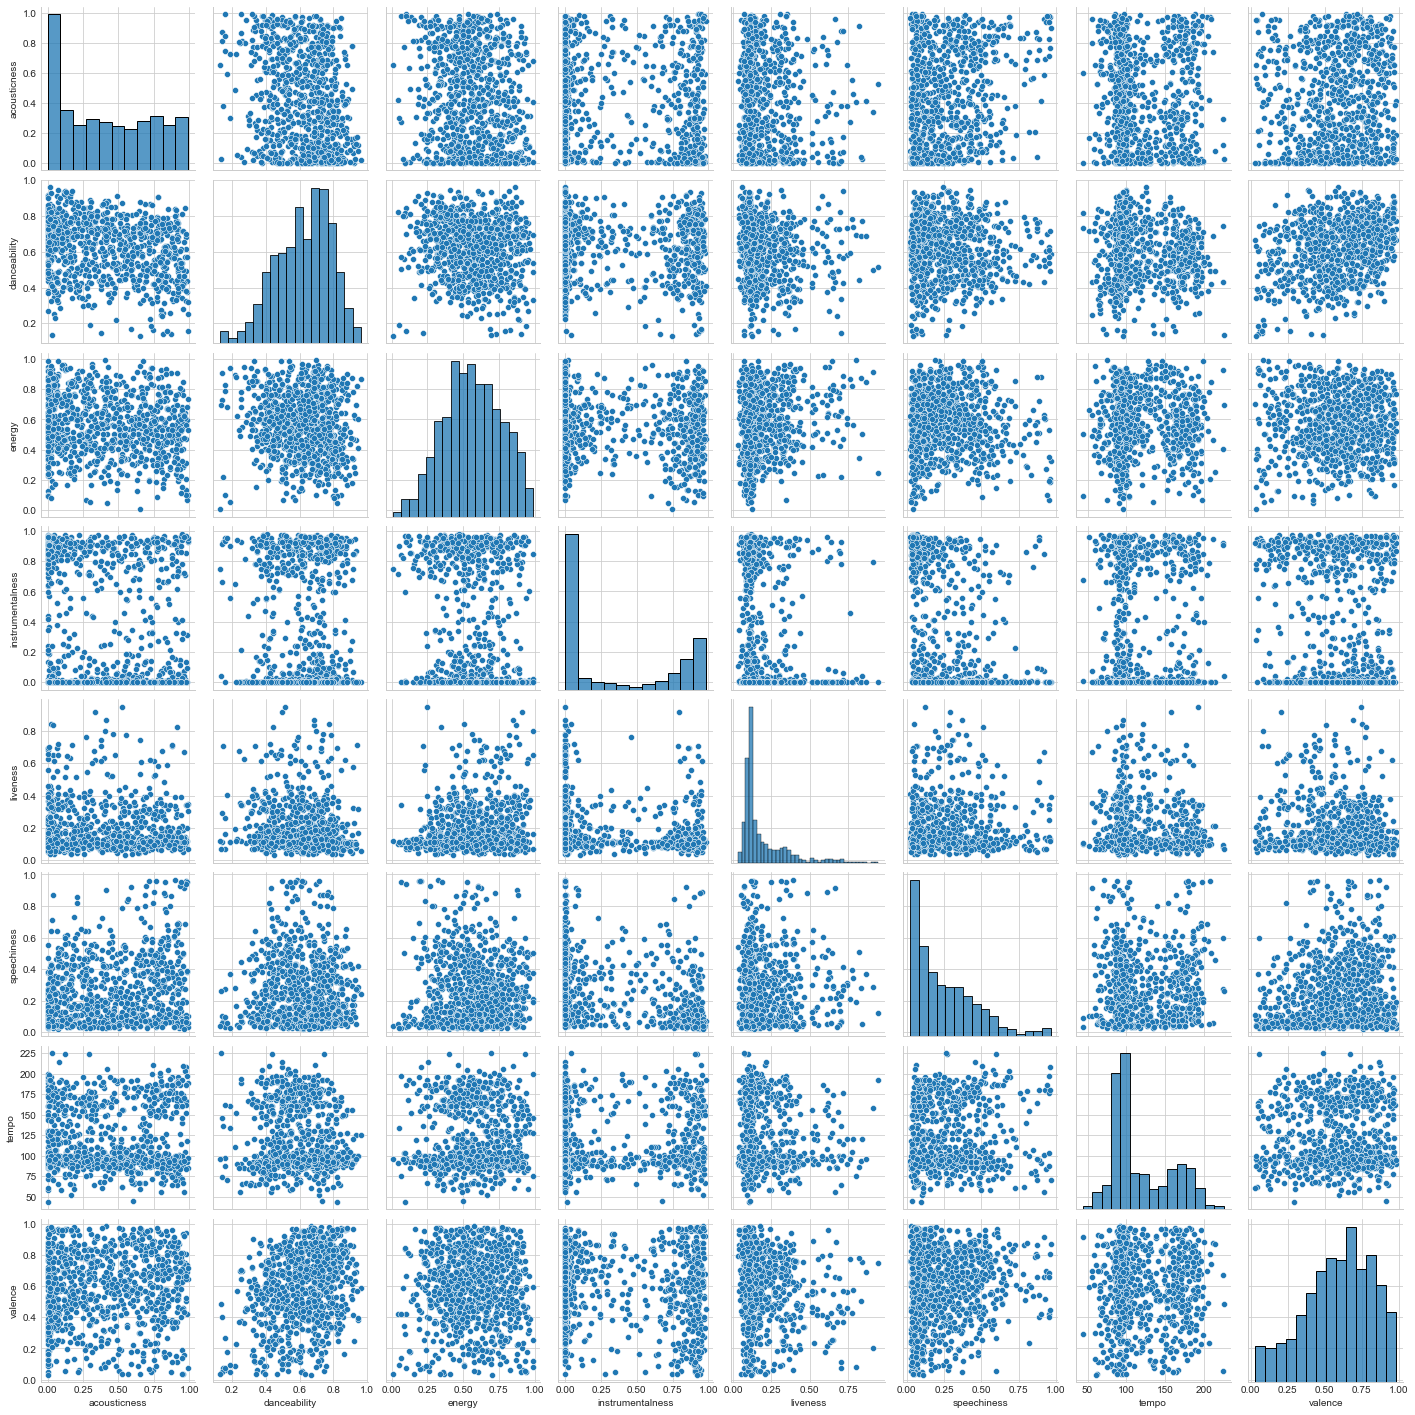

In [77]:
sns.pairplot(echo_hh)

#### Folk

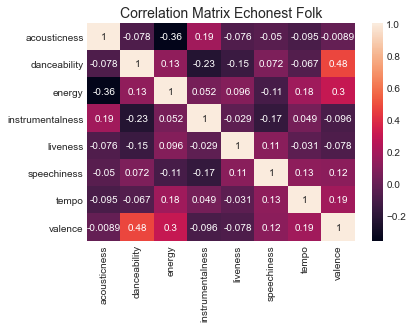

In [78]:
#Check Folk correlation
echo_folk = corr4genre(echo_genres,'Folk')

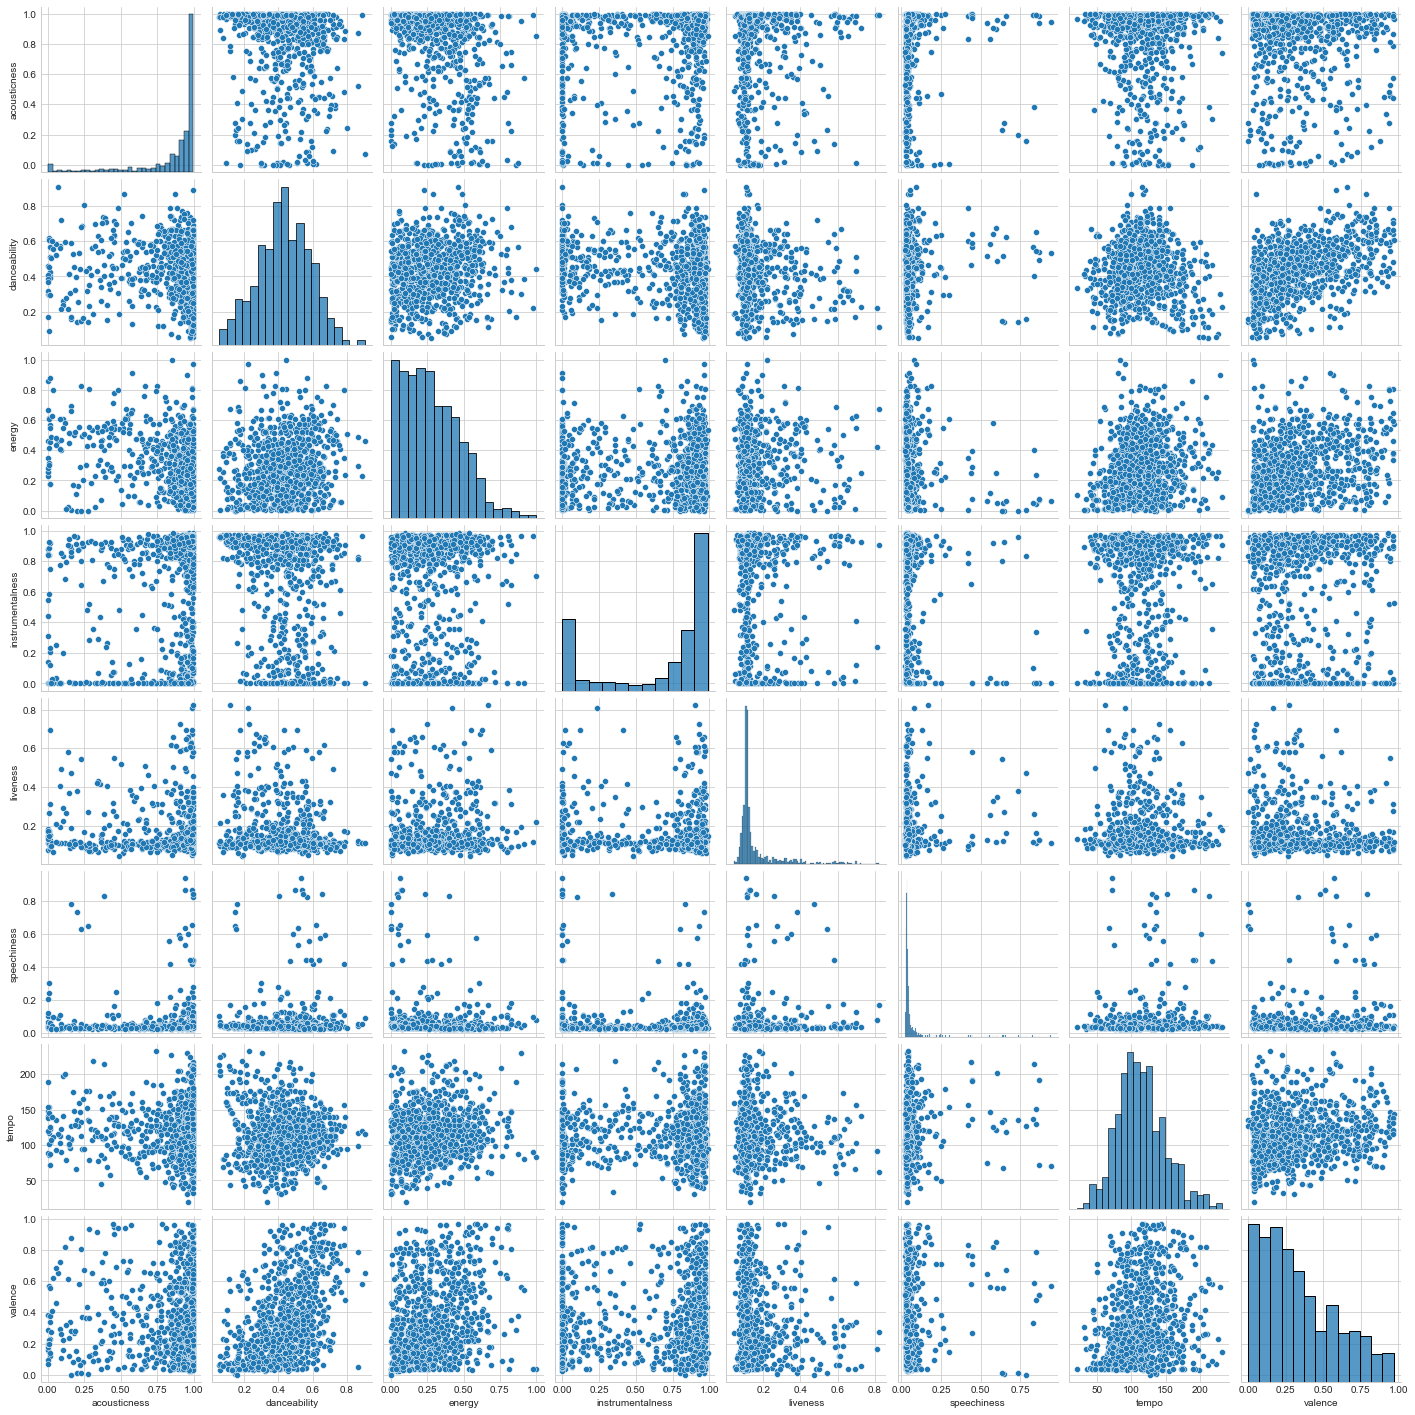

In [79]:
sns.pairplot(echo_folk)

#### Old Time / Historic

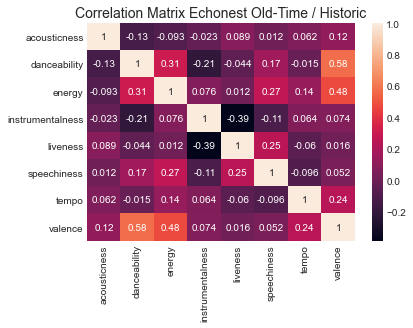

In [146]:
#Check Old-Time / Historic correlation
echo_old=corr4genre(echo_genres,'Old-Time / Historic')

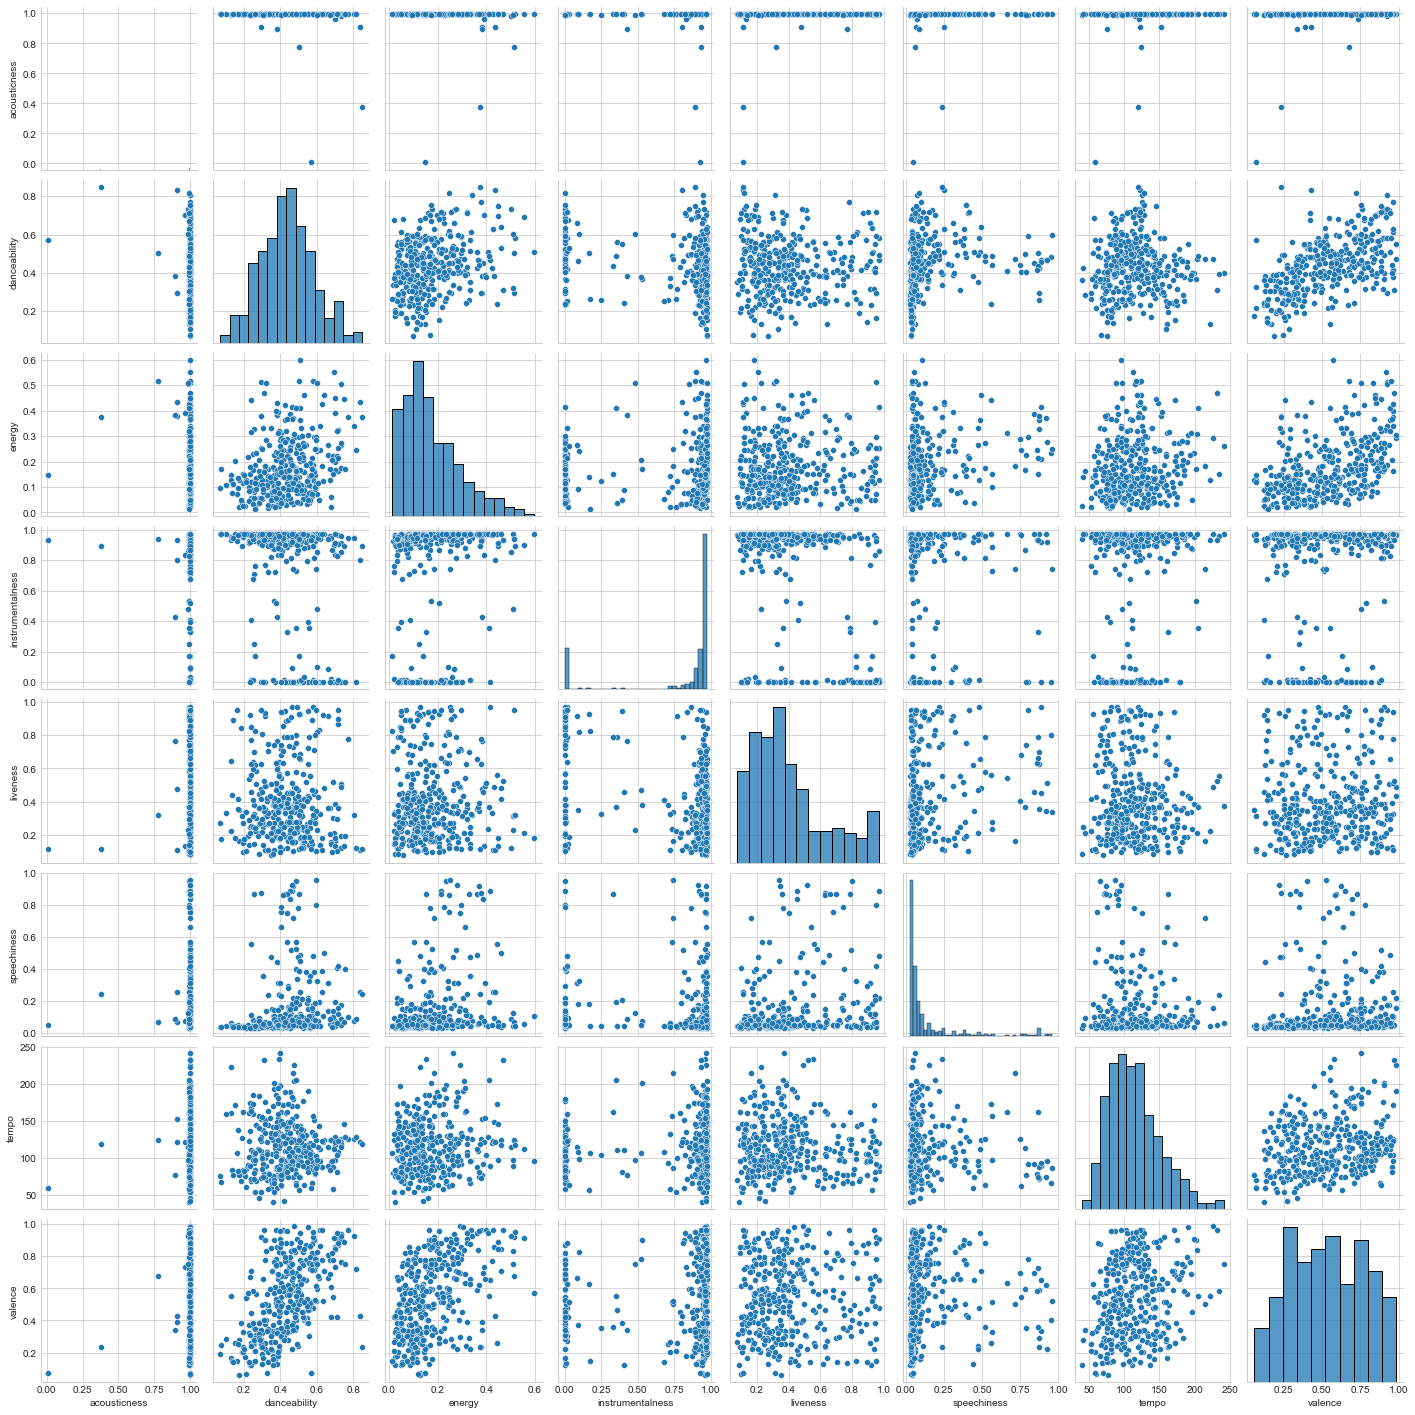

In [81]:
sns.pairplot(echo_old)

<AxesSubplot:xlabel='danceability', ylabel='valence'>

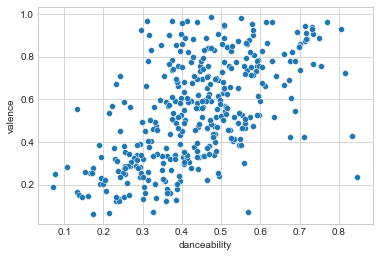

In [82]:
# Best correlation with dependent variable valence and danceability with genre historical
sns.scatterplot(data=echo_old, x='danceability', y="valence")

#### Pop

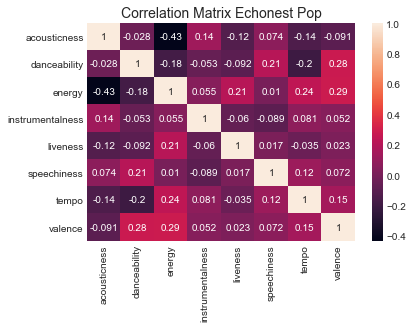

In [83]:
#Check Pop correlation
echo_pop=corr4genre(echo_genres,'Pop')

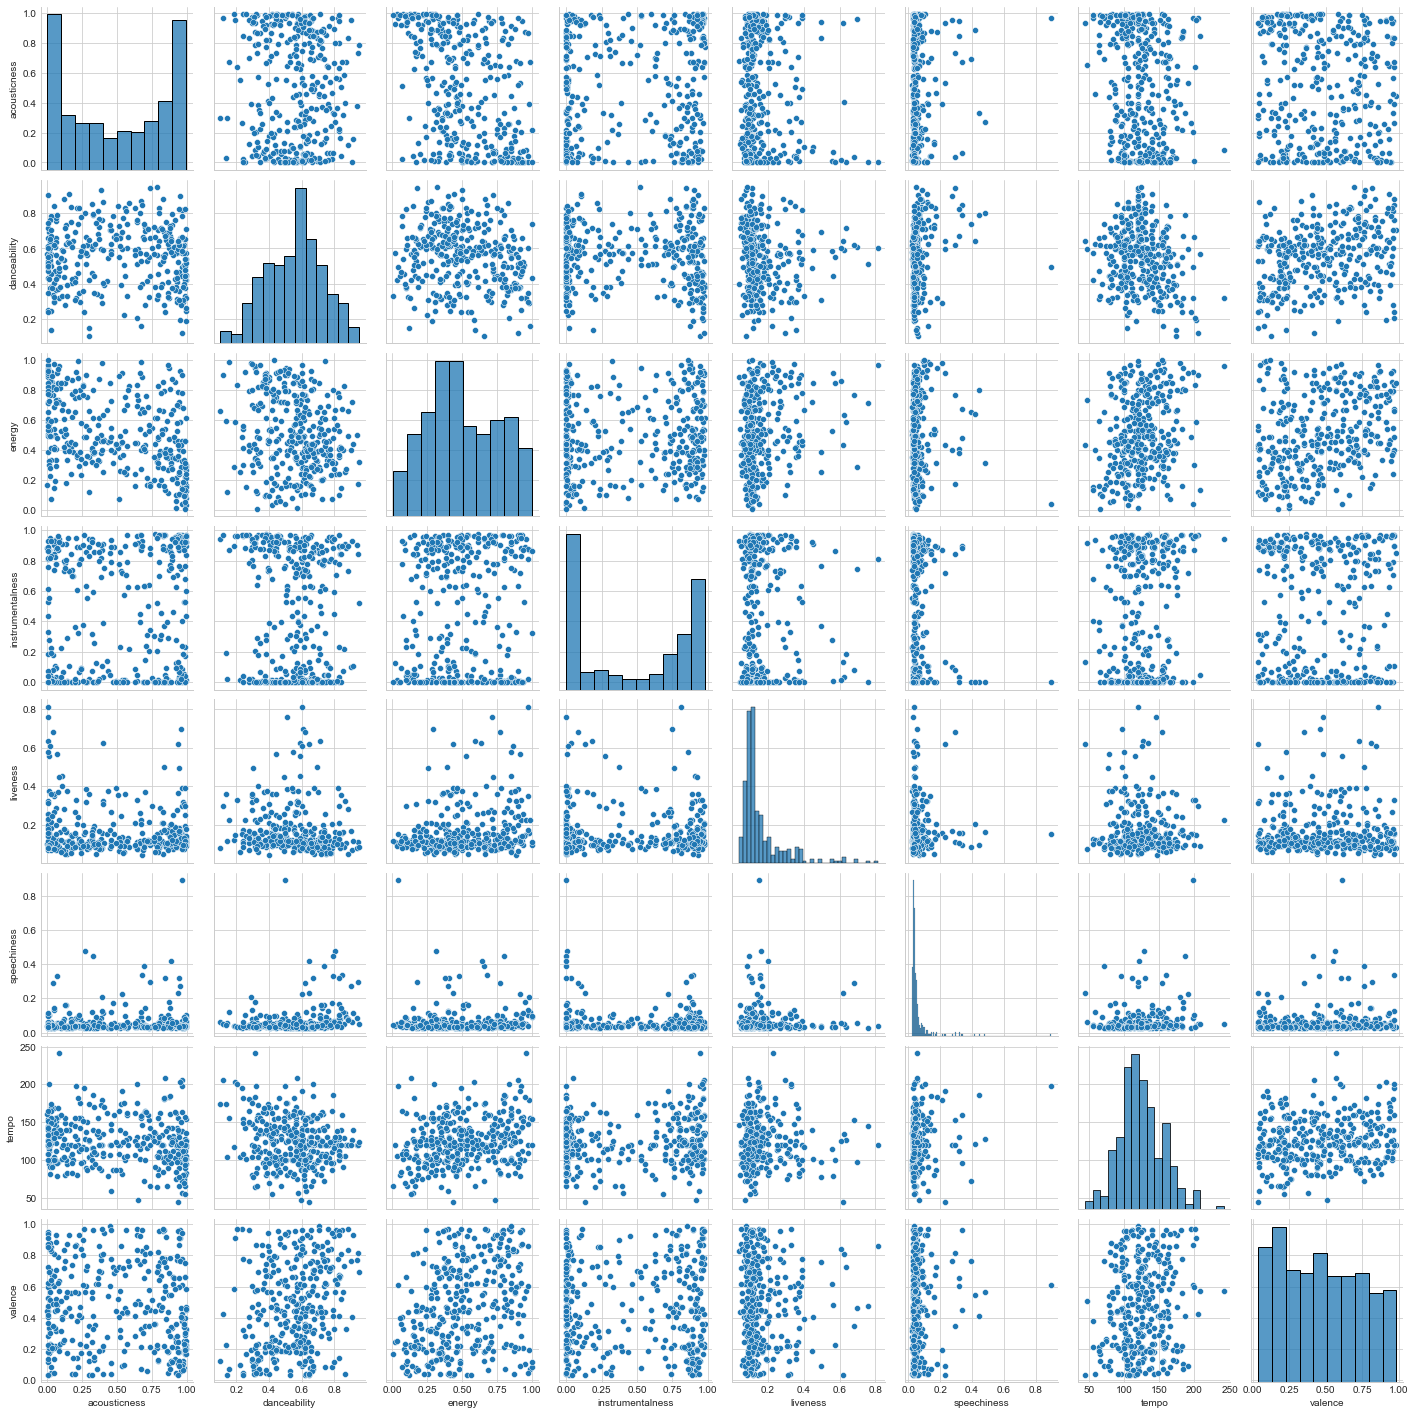

In [84]:
sns.pairplot(echo_pop)

#### Classical

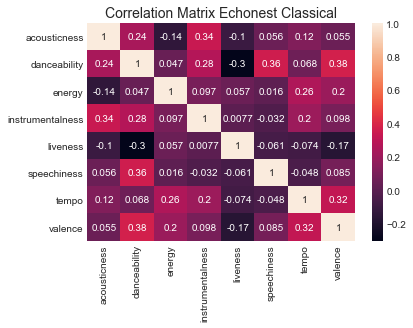

In [85]:
#Check Classical correlation
echo_classic=corr4genre(echo_genres,'Classical')

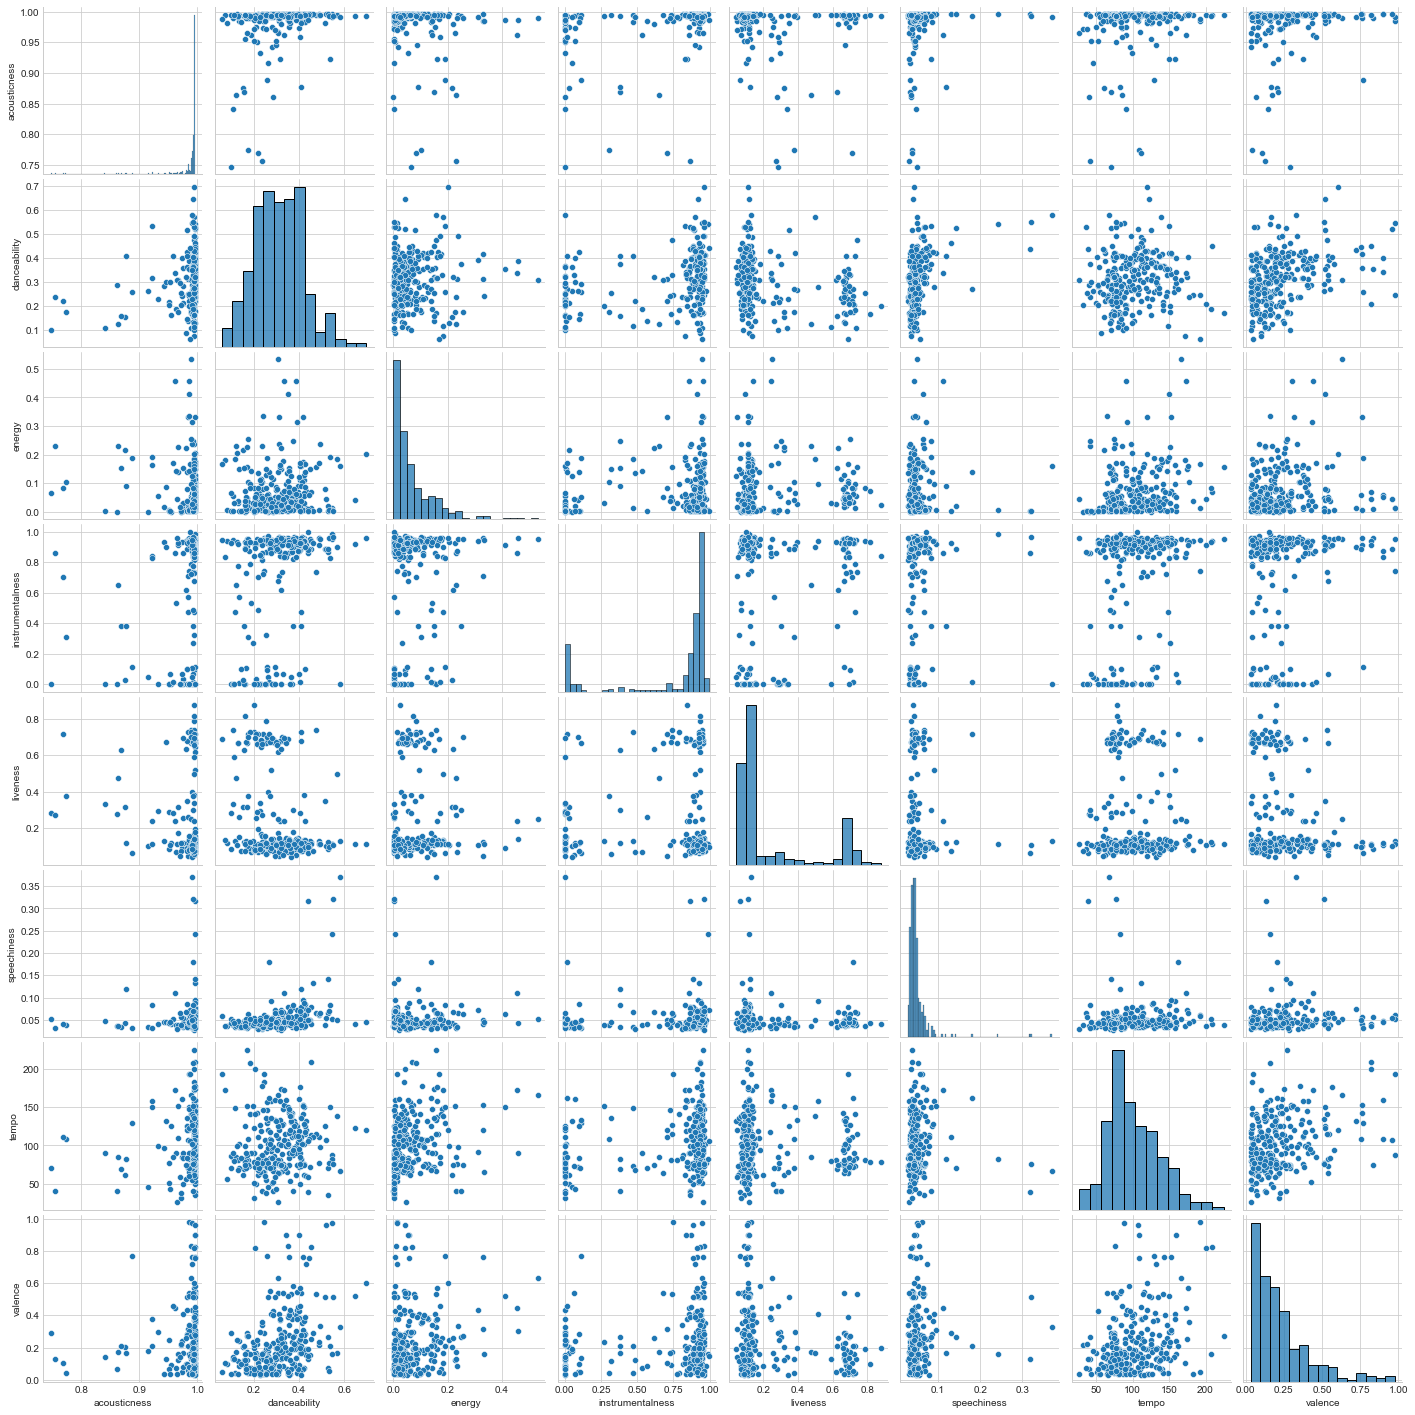

In [86]:
sns.pairplot(echo_classic)

#### Jazz

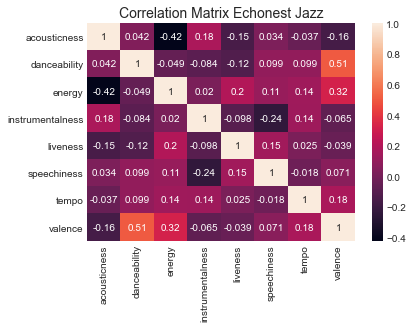

In [87]:
#Check Jazz correlation
echo_jazz = corr4genre(echo_genres,'Jazz')

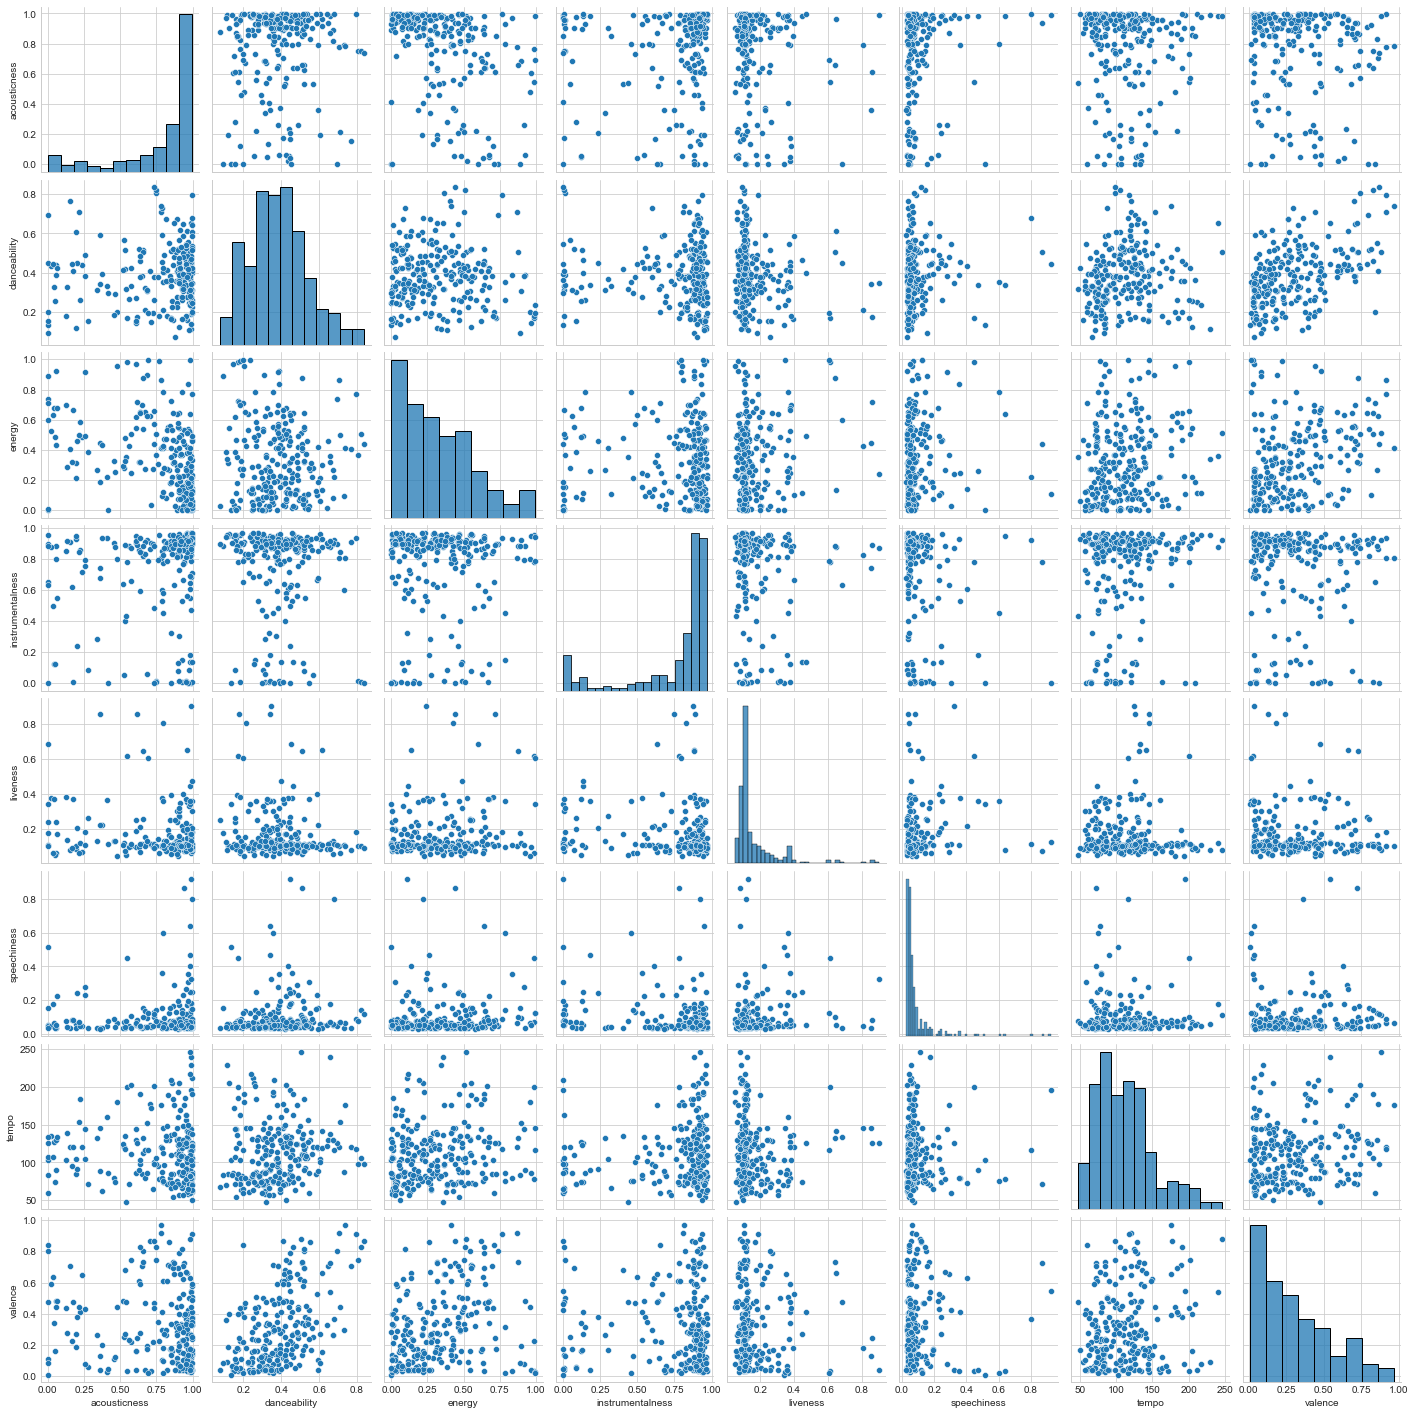

In [88]:
sns.pairplot(echo_jazz)

#### All genres (try but has no sense)

<AxesSubplot:>

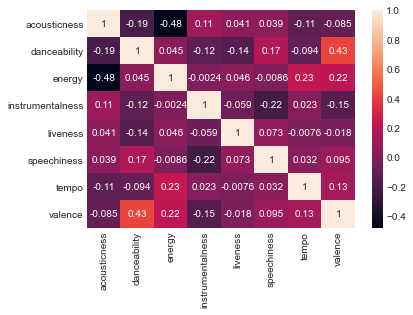

In [89]:
echo_allgenres = echo_genres.copy()
del(echo_allgenres['genre_top'])
echo_allgenres
sns.heatmap(echo_allgenres.corr(),annot=True)

## D) Simple Linear Regression 
in this case we've one independent variable and a dependent variable
### D.1) Best Linear Relationship
The best correlation we found is 0.58: between x=valence y=danceability in echonest old / historical genre.
P(danceability|valence). In general, we saw that for each genre danceability and valence are well correlated.

Text(0.5, 0, 'Valence')

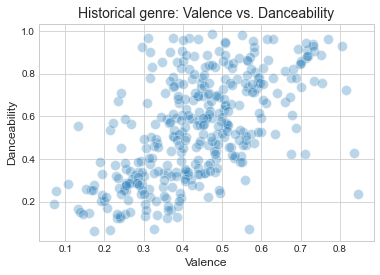

In [207]:
plt.scatter(x = 'danceability', y = 'valence', data = echo_old, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Historical genre: Valence vs. Danceability', fontsize = 14)
plt.ylabel('Danceability', fontsize = 12)
plt.xlabel('Valence', fontsize = 12)

# TODO: IMPROVE THE SCATTER ZOOMING OUT THE PLOT

### D.2) Attributes
To build a Simple Linear Regression (SLR) model, we must have an independent variable and a dependent variable. For our SLR model, we are going to take Valence as the independent variable and Danceability as the dependent variable.

In [208]:
# independent variable
X_var = echo_old[['valence']]

#dependent variable
y_var = echo_old[['danceability']]

### D.3) SLR model with Statsmodels
In this case we build a simple linear regression model which use statsmodel

In [209]:
# Ordinary Least Square
slr_model = sm.OLS(y_var,X_var)
slr_reg = slr_model.fit()

In [210]:
print( cl( slr_reg.summary(),attrs = ['bold']) )

NameError: name 'cl' is not defined

### D.4) SLR model with Scikit-learn

In [211]:
# split data in development and internal test
X, X_test, y, y_test = train_test_split(X_var, y_var, test_size=0.30 ,random_state=0)

In [212]:
# build the model
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X_test)

In [213]:
# Y = wX+B where X=valence and Y=danceability
lr_slope = lr.coef_ # weight: w
lr_intercept = lr.intercept_ # bias B
print('Coefficients: \n', lr_slope)
print('Intercept: \n', lr_intercept)

Coefficients: 
 [[0.34897955]]
Intercept: 
 [0.24408782]


Text(0.5, 0, 'Valence')

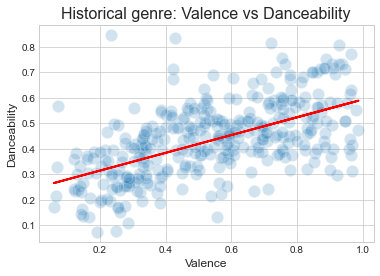

In [214]:
# plot the regression function
sns.scatterplot(x = 'valence', y = 'danceability', data = echo_old, s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot(echo_old['valence'], lr_slope*echo_old[['valence']] + lr_intercept, color = 'r', linewidth = 2)
plt.title('Historical genre: Valence vs Danceability', fontsize = 16)
plt.ylabel('Danceability', fontsize = 12)
plt.xlabel('Valence', fontsize = 12)


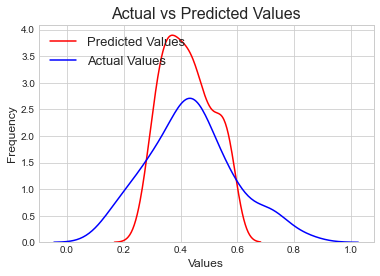

In [215]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [216]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.323
MSE: 0.016
MAE: 0.096


#### A.4.1) Lasso

In [217]:
llr = Lasso()
llr.fit(X,y)
y_pred = llr.predict(X_test)

In [218]:
llr_slope = llr.coef_ # weight: w
llr_intercept = llr.intercept_ # bias B
print('Coefficients: \n', llr.coef_)
print('Intercept: \n', llr.intercept_)

Coefficients: 
 [0.]
Intercept: 
 [0.43587374]


Text(0.5, 0, 'Valence')

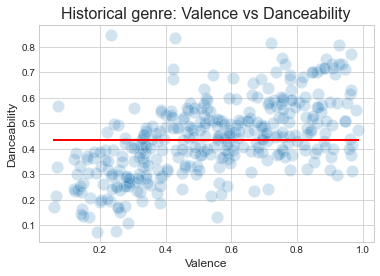

In [219]:
# plot the regression function
sns.scatterplot(x = 'valence', y = 'danceability', data = echo_old, s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot(echo_old['valence'], llr_slope*echo_old[['valence']] + llr_intercept, color = 'r', linewidth = 2)
plt.title('Historical genre: Valence vs Danceability', fontsize = 16)
plt.ylabel('Danceability', fontsize = 12)
plt.xlabel('Valence', fontsize = 12)


In [220]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.023
MAE: 0.118


#### A.4.2) Ridge

In [221]:
rlr = Ridge()
rlr.fit(X,y)
y_pred = rlr.predict(X_test)

In [222]:
rlr_slope = rlr.coef_ # weight: w
rlr_intercept = rlr.intercept_ # bias B
print('Coefficients: \n', rlr.coef_)
print('Intercept: \n', rlr.intercept_)

Coefficients: 
 [[0.3256197]]
Intercept: 
 [0.2569255]


Text(0.5, 0, 'Valence')

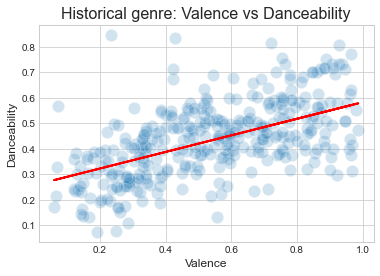

In [223]:
# plot the regression function
sns.scatterplot(x = 'valence', y = 'danceability', data = echo_old, s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot(echo_old['valence'], rlr_slope*echo_old[['valence']] + rlr_intercept, color = 'r', linewidth = 2)
plt.title('Historical genre: Valence vs Danceability', fontsize = 16)
plt.ylabel('Danceability', fontsize = 12)
plt.xlabel('Valence', fontsize = 12)


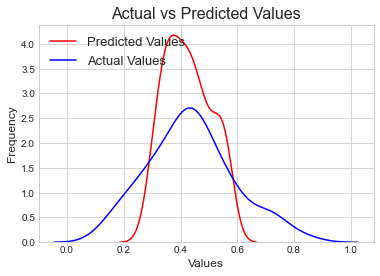

In [224]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [225]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.322
MSE: 0.016
MAE: 0.096


## E) Multiple Linear Regression
In this case we have more than one independent variable and a dependent variable. 

### E.1) Attributes
To build a Multiple Linear Regression (MLR) model, we selected two indipendents variables which the higher correlation with danceability (always in historical genre). Its are Energy and Valence, rispectivetly 0.31 and 0.58.

In [174]:
# independent variables
X_var = echo_old[['valence','energy']]

#dependent variable
y_var = echo_old[['danceability']]

### E.2) MLR model with Statsmodel

### E.3) MLR model with Scikit-learn

In [176]:
# split data in development and internal test
X, X_test, y, y_test = train_test_split(X_var, y_var, test_size=0.30 ,random_state=0)

In [177]:
# build the model (same as before)
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X_test)

In [178]:
lr_slope = lr.coef_ # weight: w
lr_intercept = lr.intercept_ # bias B
print('Coefficients: \n', lr_slope)
print('Intercept: \n', lr_intercept)

Coefficients: 
 [[0.3402155  0.03850812]]
Intercept: 
 [0.24180195]


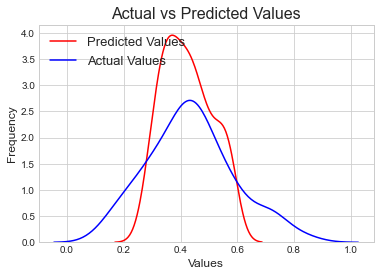

In [179]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [204]:
rmlr = Ridge()
rmlr.fit(X,y)
y_pred = rlr.predict(X_test)

In [205]:
rmlr_slope = rmlr.coef_ # weight: w
rmlr_intercept = rmlr.intercept_ # bias B
print('Coefficients: \n', rmlr.coef_)
print('Intercept: \n', rmlr.intercept_)

Coefficients: 
 [[0.3256197]]
Intercept: 
 [0.2569255]


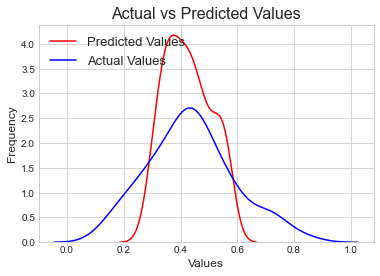

In [206]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)